In [104]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [105]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

In [106]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [107]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [108]:
(housing.price == 0).sum()

0

In [109]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [110]:
housing.shape

(545, 13)

In [111]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<Axes: xlabel='price', ylabel='Density'>

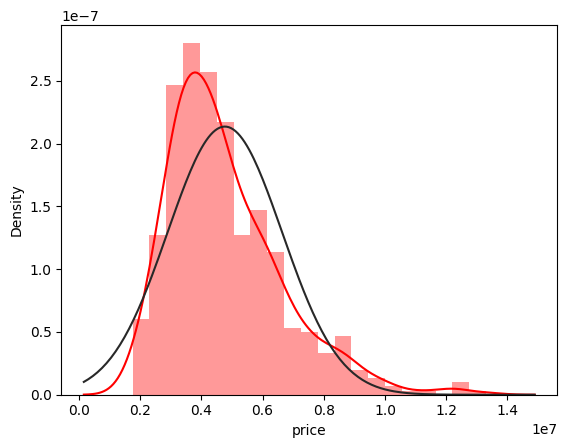

In [112]:
from scipy.stats import norm, skew
sns.distplot(housing['price'],color="red",kde=True,fit=norm)

In [113]:
housing['price'] = np.log1p(housing['price'])

<Axes: xlabel='price', ylabel='Density'>

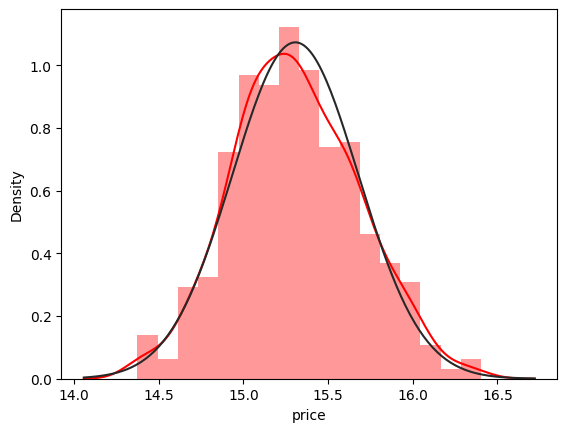

In [114]:
sns.distplot(housing['price'],color="red",kde=True,fit=norm)

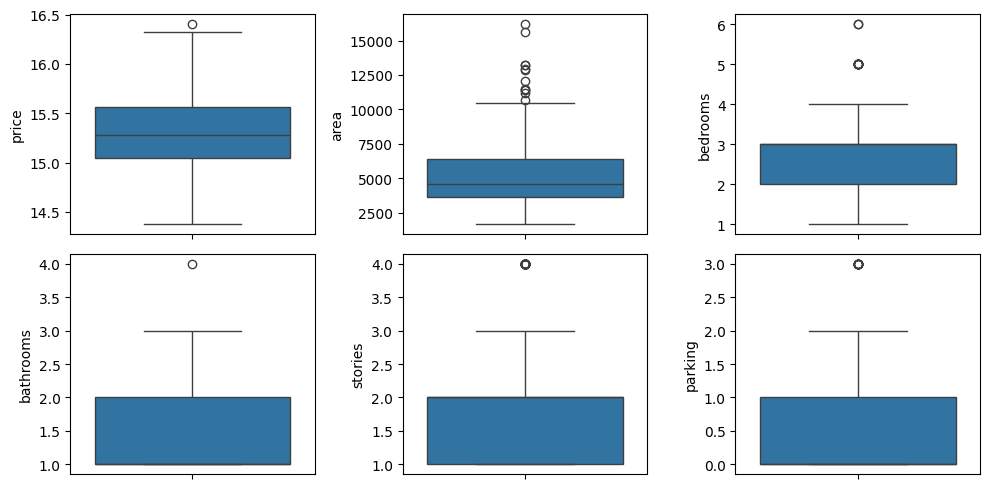

In [115]:
#Outlier Analysis

fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

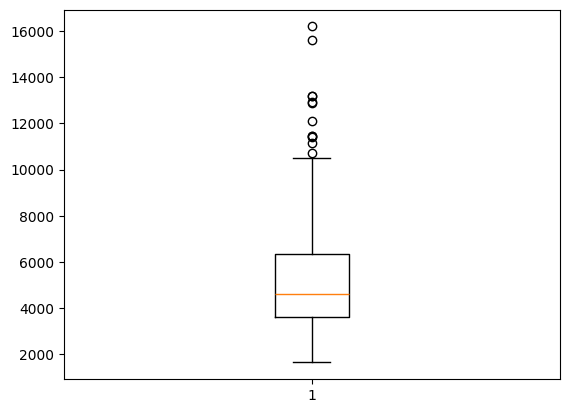

In [116]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

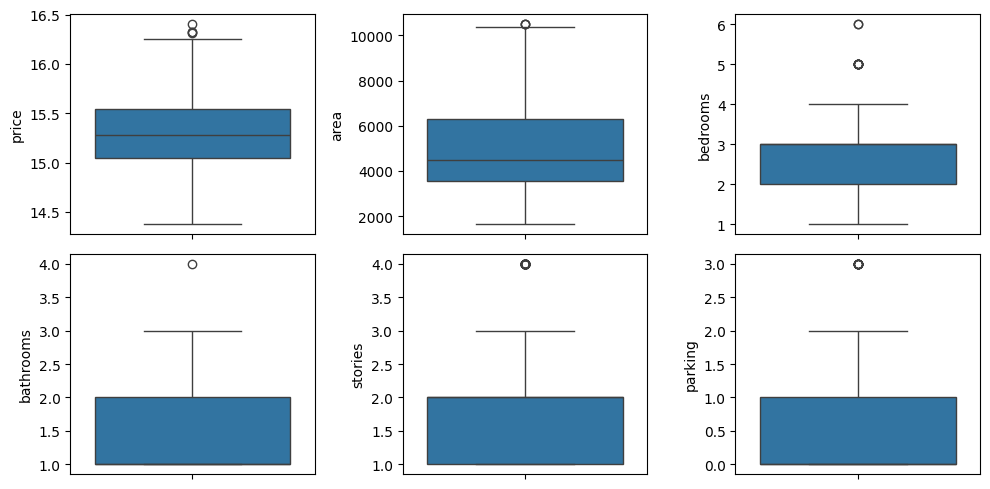

In [117]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

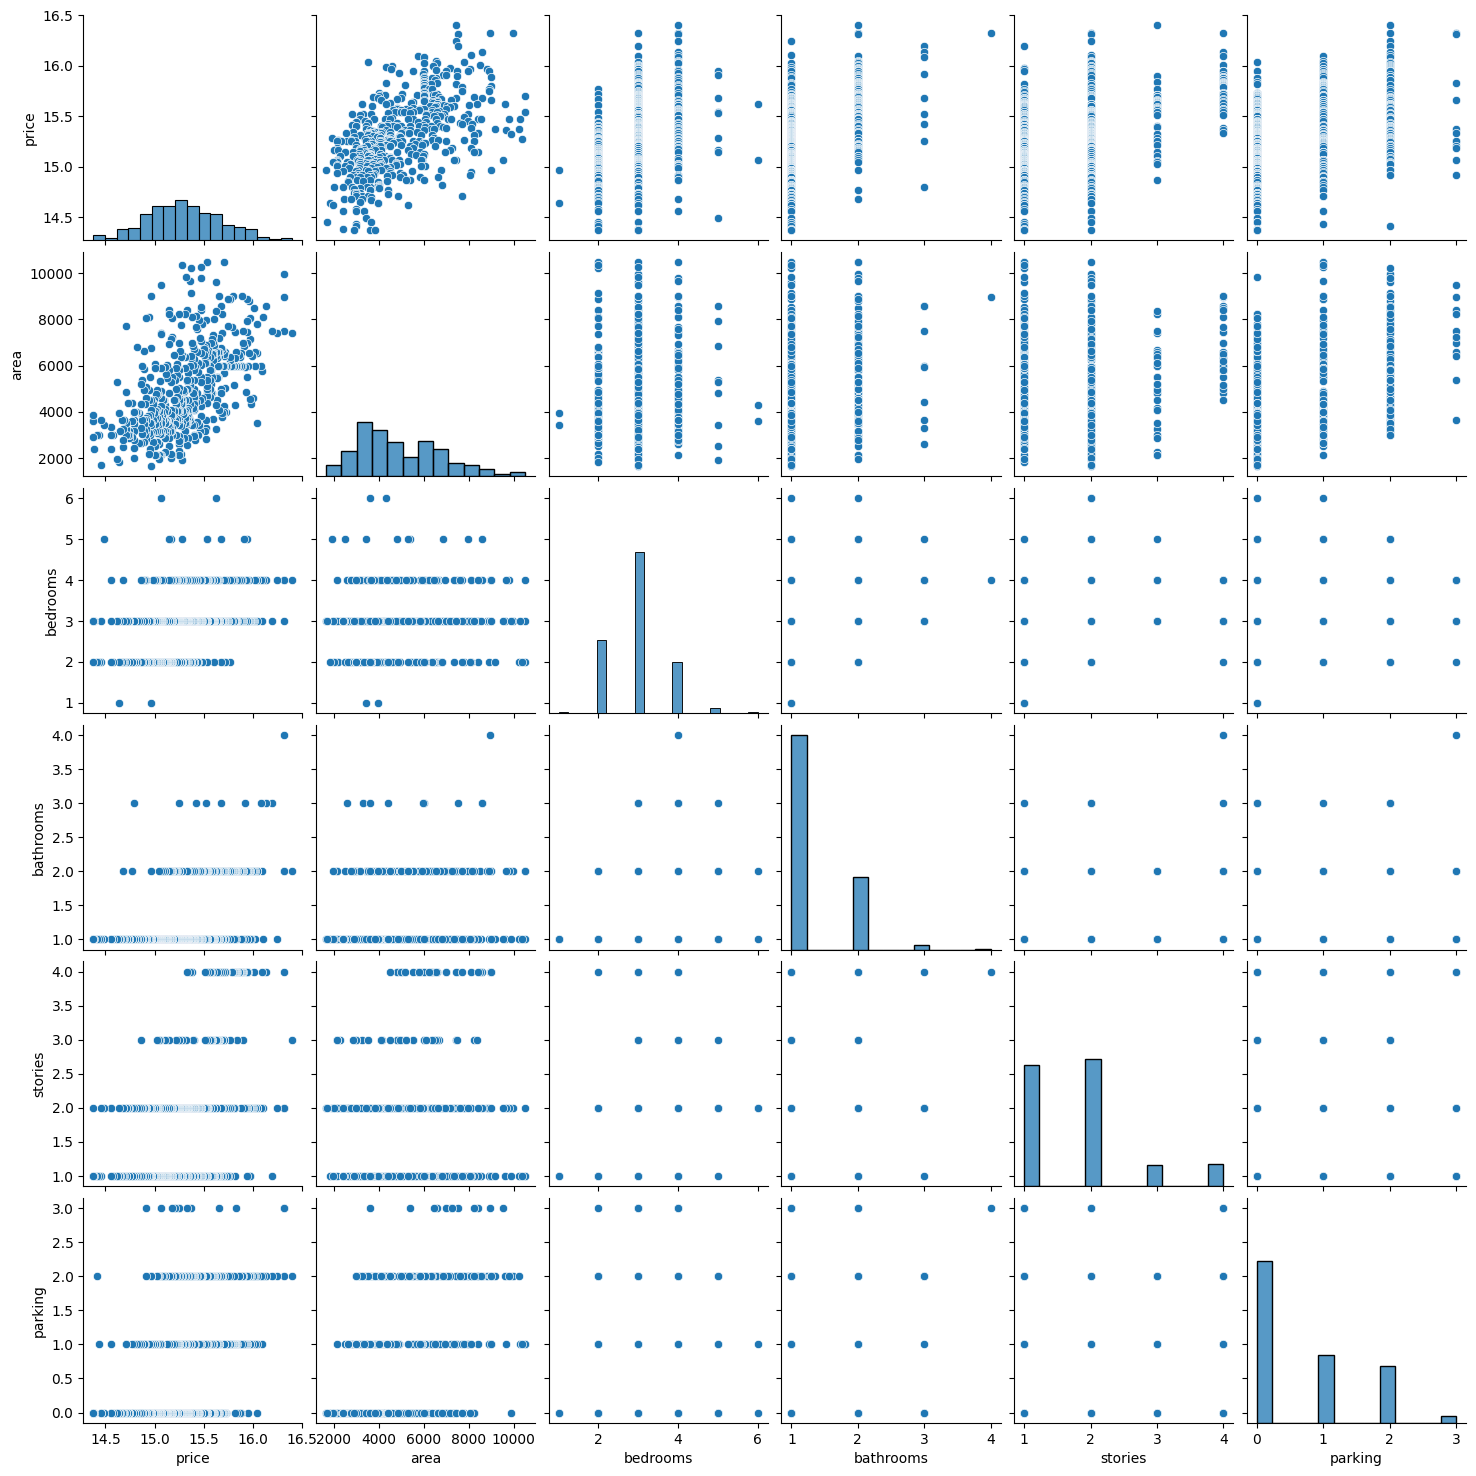

In [118]:
sns.pairplot(housing)
plt.show()

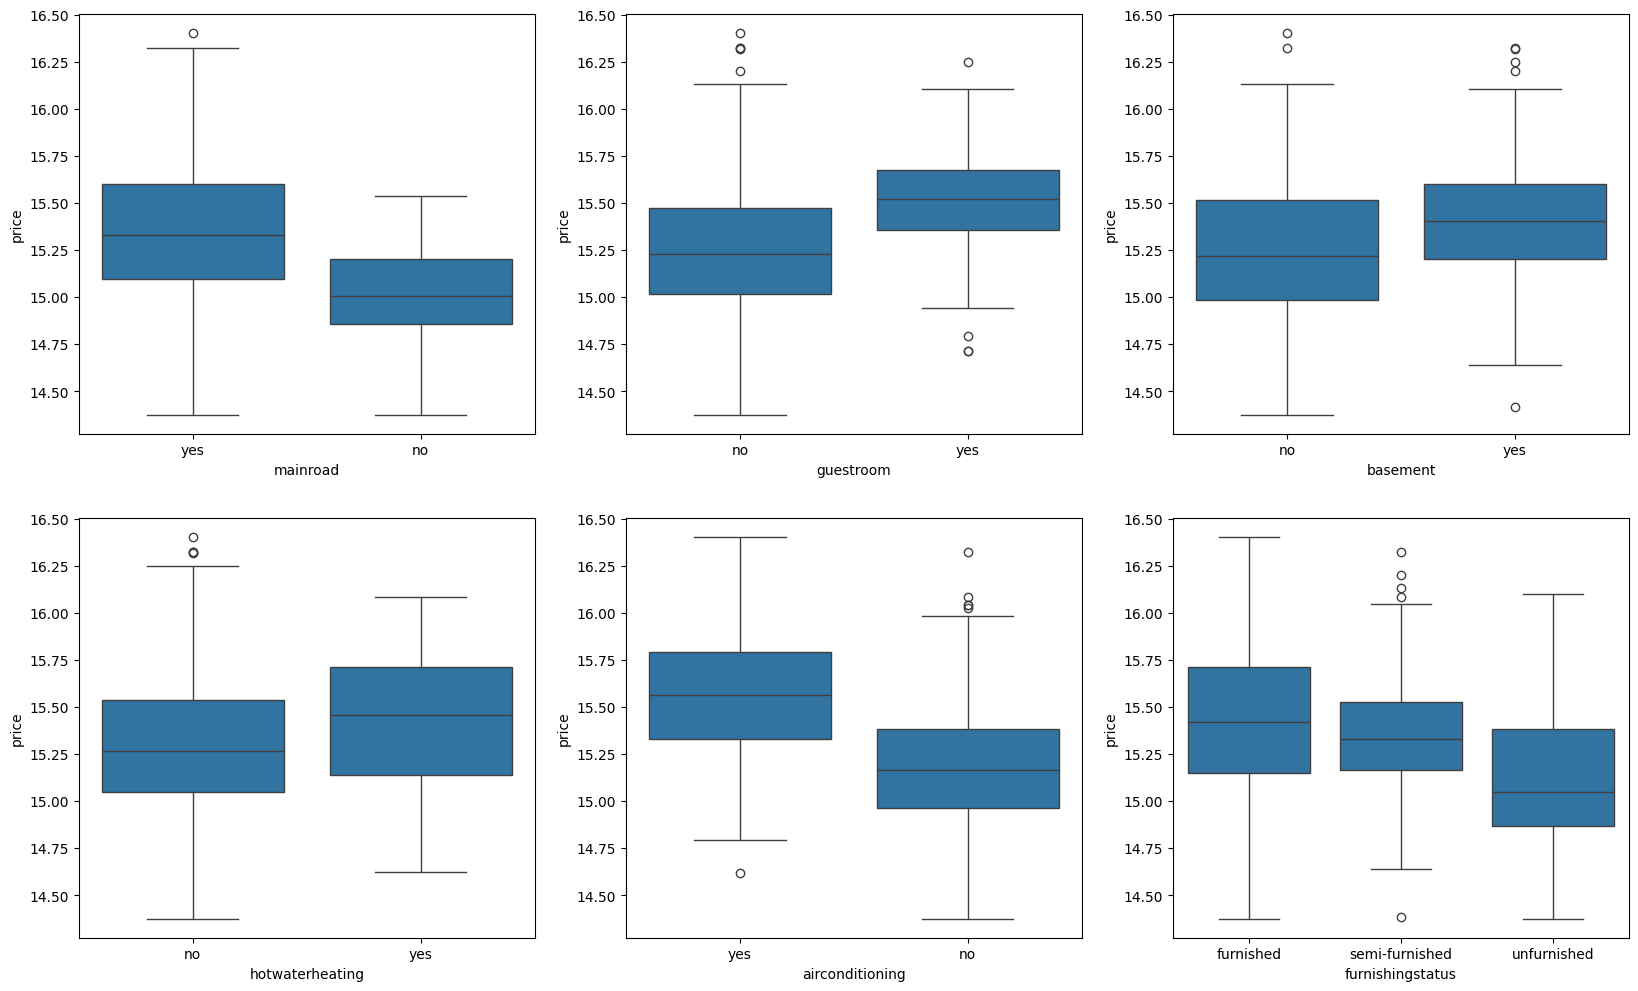

In [119]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

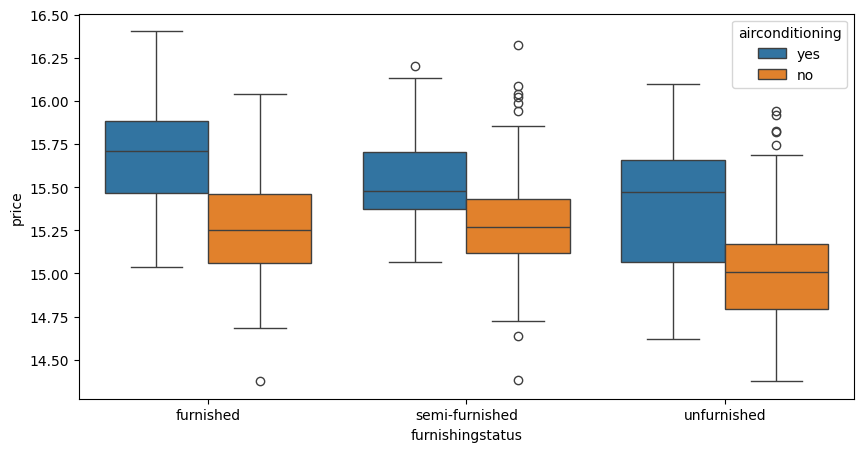

In [120]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

In [121]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [122]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,16.321037,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,16.321037,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,16.318175,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,16.250001,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [123]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

In [124]:
status.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [125]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [126]:

housing = pd.concat([housing, status], axis = 1)

In [127]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,16.403275,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,16.321037,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,16.321037,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,16.318175,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,16.250001,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False


In [128]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'semi-furnished',
       'unfurnished'],
      dtype='object')

In [129]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [130]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,16.403275,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,16.321037,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,16.321037,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,16.318175,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,16.250001,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [131]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.2, random_state = 100)

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
scaler = MinMaxScaler()

In [134]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [135]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
533,0.089896,0.079545,0.50,0.000000,0.333333,1,0,0,0,0,0.000000,0,False,True
340,0.388757,0.409091,1.00,0.333333,0.333333,1,0,0,0,0,0.000000,0,True,False
246,0.471125,0.206818,0.50,0.000000,0.000000,1,0,0,0,0,0.000000,1,True,False
1,0.959452,0.825000,0.75,1.000000,1.000000,1,0,0,0,1,1.000000,0,False,False
67,0.676075,0.681818,0.50,0.333333,0.000000,1,0,0,0,0,0.666667,0,False,True


In [136]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,0.452908,0.368551,0.483244,0.095621,0.259160,0.857909,0.182306,0.369973,0.037534,0.316354,0.225201,0.235925
std,0.179215,0.209157,0.182999,0.167833,0.290496,0.349613,0.386615,0.483446,0.190320,0.465677,0.286988,0.425146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.336808,0.206818,0.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.443834,0.318182,0.500000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.573504,0.500000,0.500000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


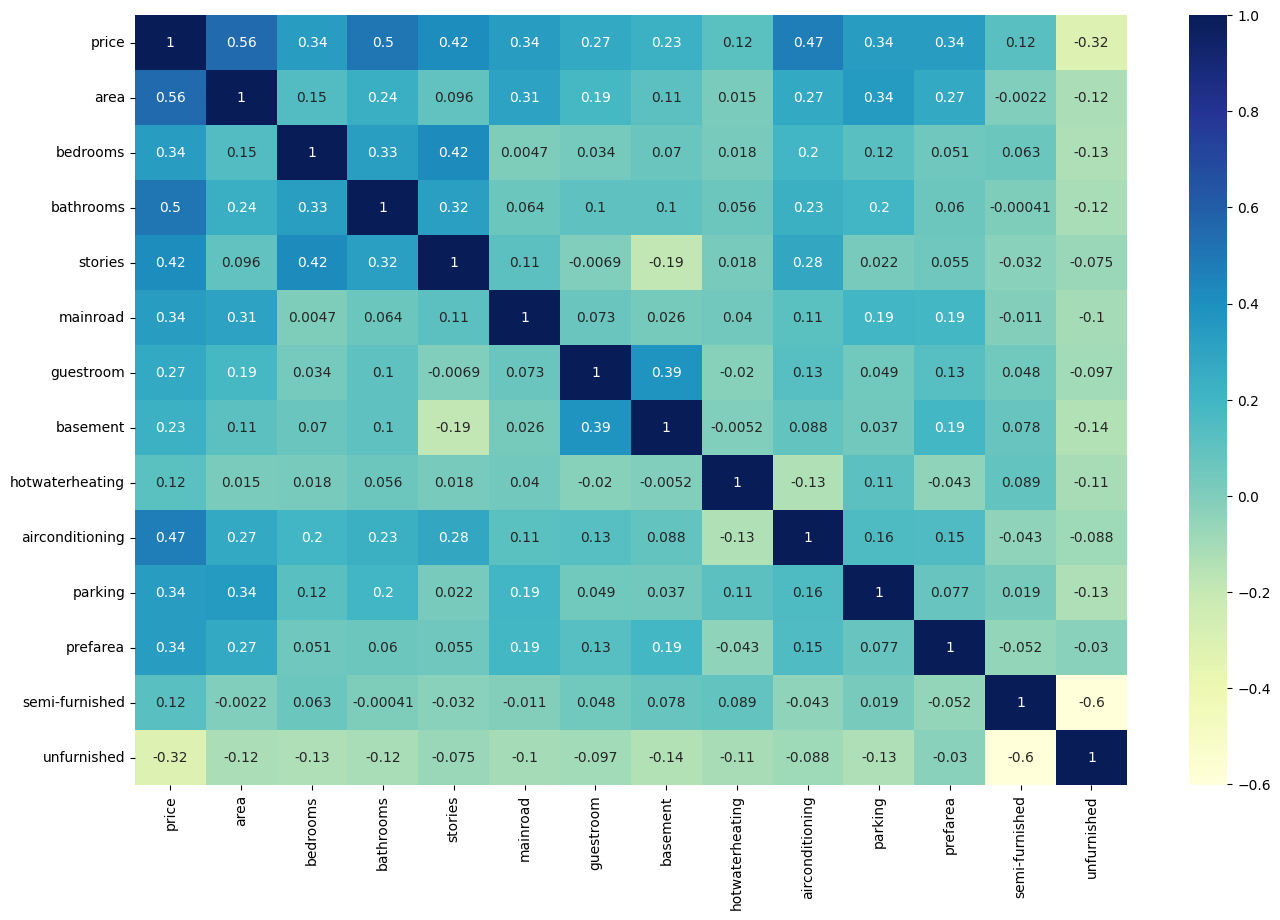

In [137]:

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [138]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [139]:
y_train = df_train.pop('price')
X_train = df_train

In [140]:
y_test = df_test.pop('price')
X_test = df_test

In [141]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [142]:
y_pred = lin_reg.predict(X_test)

In [143]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_pred, y_test)
rmse = mean_squared_error(y_pred, y_test, squared=False)
r2= r2_score(y_pred, y_test)
print('Mean Square Error(MSE):',mse)
print('Root Mean Square Error(RMSE):',rmse)
print('R2 score:', r2)

Mean Square Error(MSE): 0.010154064689561051
Root Mean Square Error(RMSE): 0.1007673790944324
R2 score: 0.6473254252543712


In [144]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [145]:
y_pred_dt = dt.predict(X_test)

In [146]:
mse = mean_squared_error(y_pred_dt, y_test)
rmse = mean_squared_error(y_pred_dt, y_test, squared=False)
r2= r2_score(y_pred_dt, y_test)
print('Mean Square Error(MSE):',mse)
print('Root Mean Square Error(RMSE):',rmse)
print('R2 score:', r2)

Mean Square Error(MSE): 0.026169518362313588
Root Mean Square Error(RMSE): 0.1617699550667972
R2 score: -1.4843412159802547


In [147]:
from sklearn.ensemble import RandomForestRegressor
scores = []
for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators = n, 
                                   max_depth = d, 
                                   random_state = 1, 
                                   n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)

        scores.append((d, n, rmse))

In [148]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,n_estimators,rmse
0,10,10,0.115390
1,10,20,0.107935
2,10,30,0.107923
3,10,40,0.105955
4,10,50,0.107046
...,...,...,...
75,25,160,0.107051
76,25,170,0.106978
77,25,180,0.106555
78,25,190,0.106384


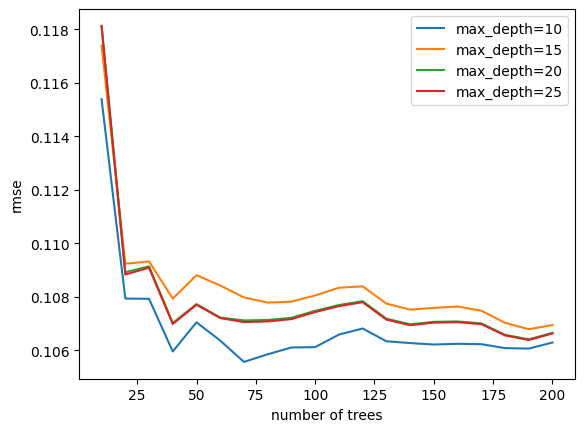

In [149]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)


plt.legend()
plt.xlabel('number of trees')
plt.ylabel('rmse')
plt.show()

In [150]:
rf = RandomForestRegressor(n_estimators = 73,
                           max_depth = 10,
                           random_state = 1,
                           n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=73, n_jobs=-1, random_state=1)

In [151]:
y_pred_rf = rf.predict(X_test)

In [152]:
mse = mean_squared_error(y_pred_rf, y_test)
rmse = mean_squared_error(y_pred_rf, y_test, squared=False)
r2= r2_score(y_pred_rf, y_test)
print('Mean Square Error(MSE):',mse)
print('Root Mean Square Error(RMSE):',rmse)
print('R2 score:', r2)

Mean Square Error(MSE): 0.011058702195518199
Root Mean Square Error(RMSE): 0.10516036418498273
R2 score: 0.5532051367535852
